# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # Splitting and loading MNIST dataset into Train & Test set

(60000, 28, 28)


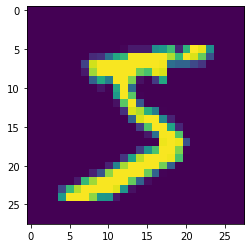

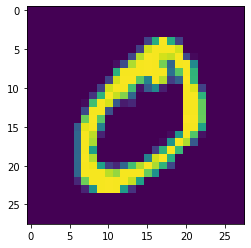

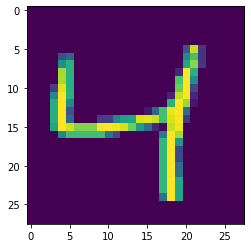

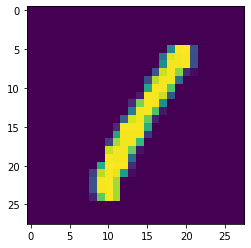

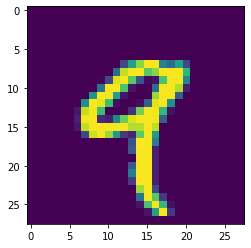

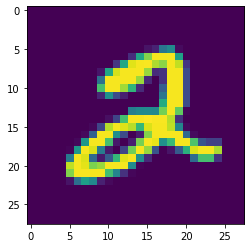

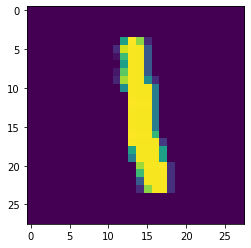

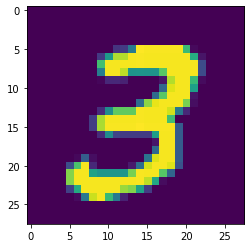

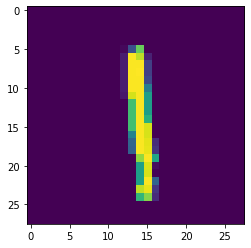

In [59]:
print (X_train.shape)   # Shape of MNIST Dataset Images. Here, 60000 images of 28x28
from matplotlib import pyplot as plt
%matplotlib inline
for i in range (0,9):   # Printing 10 images from Train Set
  plt.figure()
  plt.imshow(X_train[i])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [24]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [26]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(32, (1, 1), activation = 'relu'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Convolution2D(32, (1, 1), activation = 'relu'))
model.add(Convolution2D(64, (3,3), activation='relu'))



model.add(Convolution2D(10,(3,3)))

model.add(Flatten())
model.add(Activation('softmax'))

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 32)        2080      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 5, 5, 32)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [48]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.1449 - acc: 0.9547
Epoch 2/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0477 - acc: 0.9852
Epoch 3/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0350 - acc: 0.9892
Epoch 4/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0284 - acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0232 - acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0210 - acc: 0.9932
Epoch 7/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0174 - acc: 0.9943
Epoch 8/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0141 - acc: 0.9953
Epoch 9/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0130 - acc: 0.9958
Epoch 10/10
60000/60000 [==============================] - 11s 188us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [50]:
print(score)

[0.029835257391146116, 0.9916]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.0593689e-17 6.3046323e-17 8.9005447e-13 1.8406407e-10 8.0754371e-19
  8.0671096e-15 1.1510667e-24 1.0000000e+00 2.1262439e-10 2.7205176e-11]
 [2.5421015e-15 5.1460576e-12 1.0000000e+00 1.7606363e-12 6.3726551e-23
  3.3248325e-16 4.4326671e-09 1.8222993e-27 1.8873889e-12 3.6800765e-21]
 [3.7568029e-08 9.9987435e-01 6.9531761e-06 6.3134886e-10 9.9738187e-05
  5.2485571e-08 1.0483473e-07 1.0138228e-06 1.7757657e-05 1.9014761e-10]
 [1.0000000e+00 2.2739057e-15 6.6718070e-10 5.6225624e-15 4.5025926e-16
  2.7407175e-13 1.3530634e-09 3.9892802e-13 5.8574483e-14 4.0855683e-12]
 [1.0115652e-12 6.9521903e-14 1.3467061e-13 1.9833676e-13 9.9999976e-01
  4.2785103e-16 1.6022580e-12 5.5436229e-11 6.7551126e-10 2.2112354e-07]
 [2.3979660e-10 9.9982810e-01 3.5553690e-08 3.5910691e-11 1.0332796e-05
  1.4169725e-10 2.0029900e-11 1.5314015e-04 8.3647601e-06 3.8377021e-10]
 [1.4182455e-19 9.8074493e-11 5.7774190e-09 2.3251079e-13 9.9966061e-01
  6.0978769e-09 2.3871165e-16 2.2344653e-09 3.3876873e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

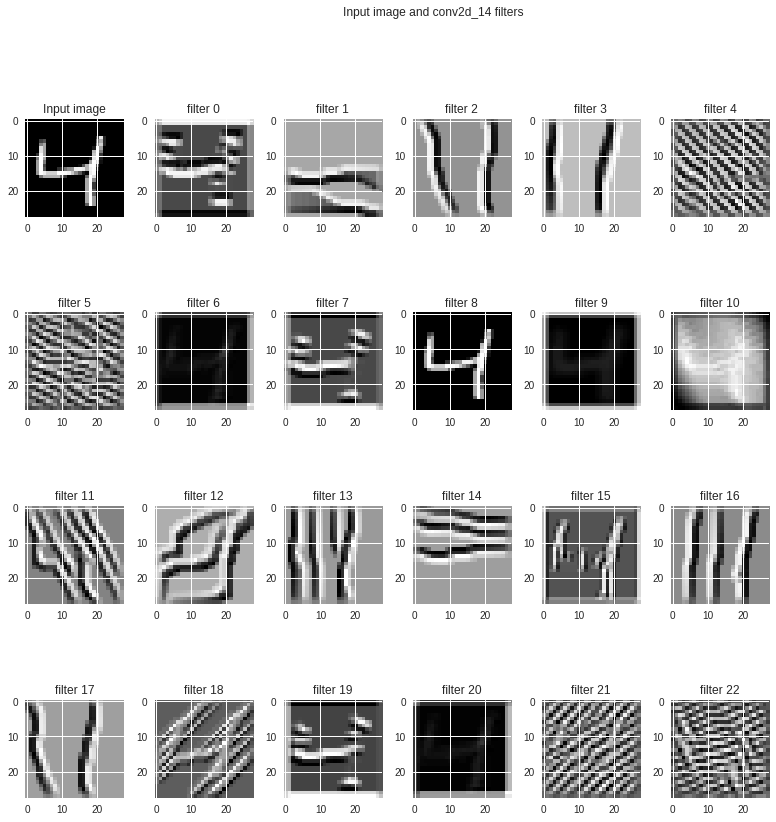

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()